In [1]:
pip install keras tensorflow scikit-learn numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 MB 24.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 25.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 24.3 MB/s eta 0:00:00a 0:00:01


In [1]:

import pandas as pd

# Load the training and testing data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [2]:
# Select the features to be used for the autoencoder
#selected_features = [1, 8, 12, 14, 79, 15, 18, 25, 28, 32, 33, 37, 39, 44, 46, 55, 56]
selected_features = [
    'Dst Port', 'Fwd Packet Length Max', 'Bwd Packet Length Max',
    'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Mean',
    'Fwd IAT Std', 'Bwd IAT Mean', 'Fwd PSH Flags', 'Bwd PSH Flags',
    'Fwd RST Flags', 'Fwd Header Length', 'Packet Length Max',
    'Packet Length Std', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg',
    'ICMP Type'
]
X_train = train_data.loc[:, selected_features]
y_train = train_data['Label']  # Assuming the last column is 'Label'
X_test = test_data.loc[:, selected_features]
y_test = test_data['Label']    # Assuming the last column is 'Label'


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score

# Assuming train_data and test_data are already defined and preprocessed

# Split the train_data into features and labels
X_train = train_data.loc[:, selected_features]
y_train = train_data['Label']  # 'Label' is already numerical

# Split the test_data into features and labels
X_test = test_data.loc[:, selected_features]
y_test = test_data['Label']  # 'Label' is already numerical

# Initialize and train the LDA model
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)

# Make predictions on the training and testing data
lda_training_predictions = lda.predict(X_train)
lda_testing_predictions = lda.predict(X_test)

# Print classification reports and accuracy scores
print("--- Training Data ---")
print(classification_report(y_train, lda_training_predictions))
print("Training Accuracy:", accuracy_score(y_train, lda_training_predictions))

print("--- Test Data ---")
print(classification_report(y_test, lda_testing_predictions))
print("Test Accuracy:", accuracy_score(y_test, lda_testing_predictions))




--- Training Data ---
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    645630
           1       0.95      0.67      0.79    180926

    accuracy                           0.92    826556
   macro avg       0.93      0.83      0.87    826556
weighted avg       0.92      0.92      0.92    826556

Training Accuracy: 0.921319305648982
--- Test Data ---
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    276768
           1       0.95      0.68      0.79     77471

    accuracy                           0.92    354239
   macro avg       0.93      0.83      0.87    354239
weighted avg       0.92      0.92      0.92    354239

Test Accuracy: 0.921795736776583


In [4]:
import numpy as np

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


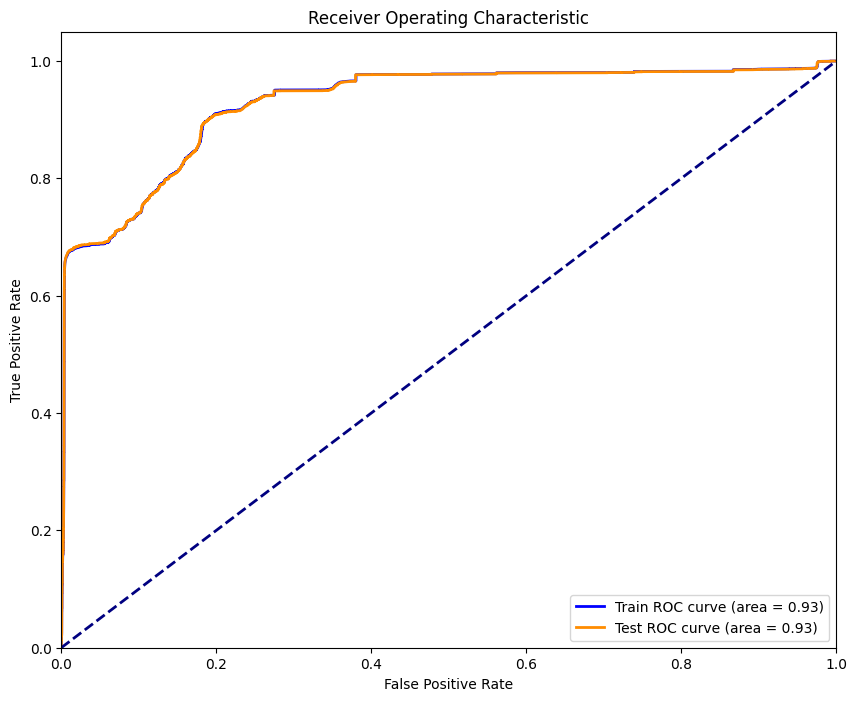

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Get the scores from the LDA model
lda_scores_train = lda.decision_function(X_train)
lda_scores_test = lda.decision_function(X_test)

# Compute ROC curve and ROC area for training data
fpr_train, tpr_train, _ = roc_curve(y_train, lda_scores_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and ROC area for test data
fpr_test, tpr_test, _ = roc_curve(y_test, lda_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for training data
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)

# Plot ROC curve for test data
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()
